# Exploratory Data Analysis for Goalie Stats between 1950 and 2020 Part II

In this notebook, we will do multivariate comparative exploratory data analysis for our data sets for goalie data between 1950-2020.  Let's get started.

In [1]:
#First, let's download our data sets that we produced in the data collection notebooks
import pandas as pd

goalieBioDF = pd.read_csv('GoalieBios1950-2020-Filtered-For-Analysis.csv', index_col = 0)

goalieBioDF.head()

,Player,Country,Draft Position,1st Season,HOF,GP,W,Career Save %,GAA
1,Jeff Zatkoff,USA,74.0,20132014,N,48,18,0.912250,2.492500
5,Wendell Young,CAN,73.0,19851986,N,187,59,0.876800,3.861000
9,Ken Wregget,CAN,45.0,19831984,N,575,225,0.885647,3.666471
10,Chris Worthy,GBR,NaN,19681969,N,26,5,0.861333,4.706667
11,Gump Worsley,CAN,NaN,19521953,Y,860,333,0.912842,2.812857


In [2]:
goalieStatsDF = pd.read_csv('GoalieStats1950-2020-Filtered.csv', index_col = 0)

goalieStatsDF.head()

,Player,Season,GP,W,Sv%,GAA,Age
1768,Aaron Dell,20162017,20,11,0.931,2.00,27
1390,Aaron Dell,20172018,29,15,0.914,2.64,28
1949,Aaron Dell,20182019,25,10,0.886,3.17,29
1698,Aaron Dell,20192020,33,12,0.907,3.01,30
3424,Aaron Dell,20202021,7,1,0.857,4.14,31


Let's first create a function to easily create a labelled scatter plot.

In [3]:
import matplotlib.pyplot as plt

def scatterPlot(dataFrame, attributeX, attributeY, ymin = 0, ymax = 1):
    plt.figure(figsize=[12,9])
    plt.scatter(x = attributeX, y = attributeY, data = dataFrame)
    plt.title(attributeX + ' vs. ' + attributeY)
    plt.xlabel(attributeX)
    plt.ylabel(attributeY)
    plt.ylim(ymin, ymax)
    plt.show()

Let's first plot Save % by season to see how save % has varied through the years.

In [4]:
goalieStatsDF.sort_values(by = 'Season', ascending = True, inplace = True)

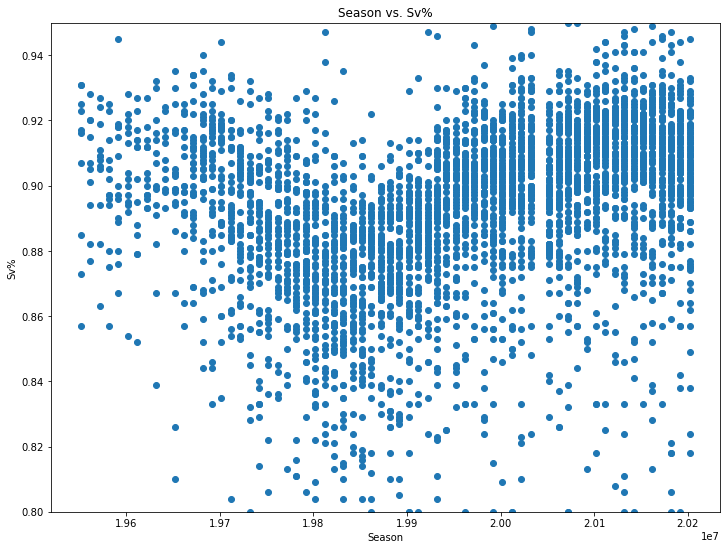

In [5]:
scatterPlot(goalieStatsDF, 'Season', 'Sv%', 0.8, 0.95)

There are two things that are clear from this scatter plot.  One is the dip in Save % in the 80's and early 90's.  The other is the white vertical line for the 2004-2005 season.  This is because that season did not happen due to the NHL lockout.

Now let's check the plot of Save % over the course of each goalie's career.

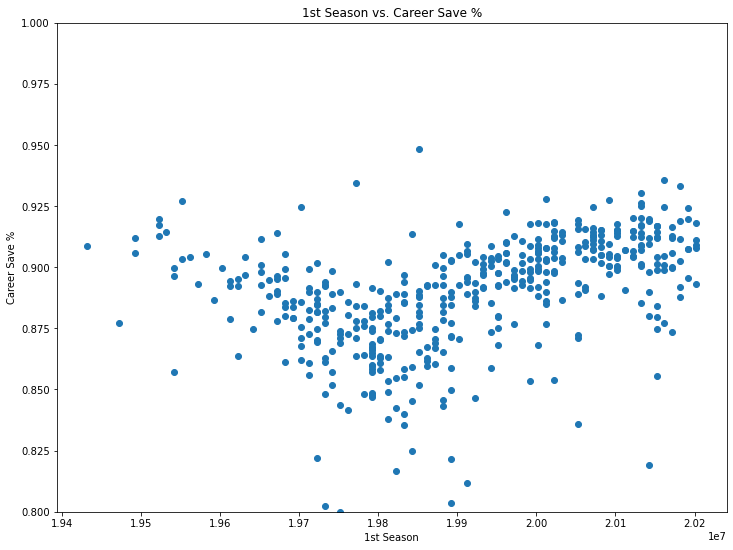

In [6]:
scatterPlot(goalieBioDF, '1st Season', 'Career Save %', 0.8, 1.0)

Now the dip is slightly earlier.  This makes sense since goalies who started their first season in the mid to late 70's played most of their career during the dip in the 80's.

Let's check age vs Save % now.

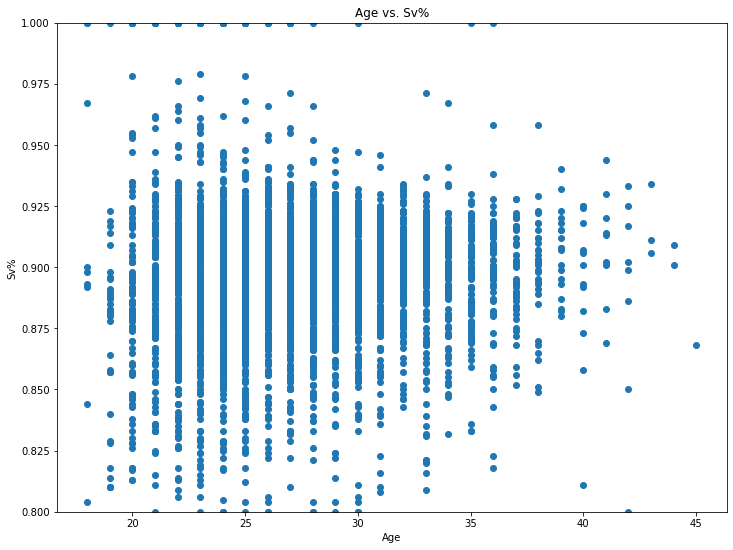

In [7]:
scatterPlot(goalieStatsDF, 'Age', 'Sv%', 0.8, 1.0)

The above graph shows that there are fewer data points as goalies get older, but most of the data points for goalies over 35 years old are with higher save %'s.  So the goalies who play past 35 appear to be the better goalies who consistently get better save %.

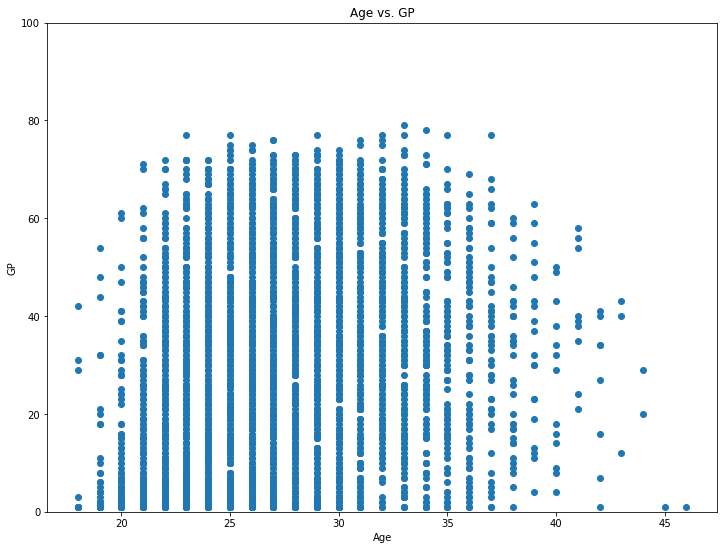

In [8]:
scatterPlot(goalieStatsDF, 'Age', 'GP', 0, 100)

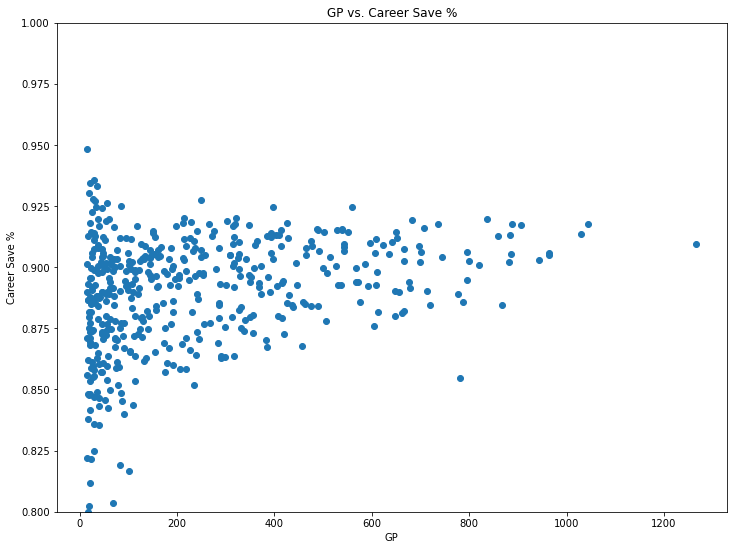

In [9]:
scatterPlot(goalieBioDF, 'GP', 'Career Save %', 0.8, 1.0)

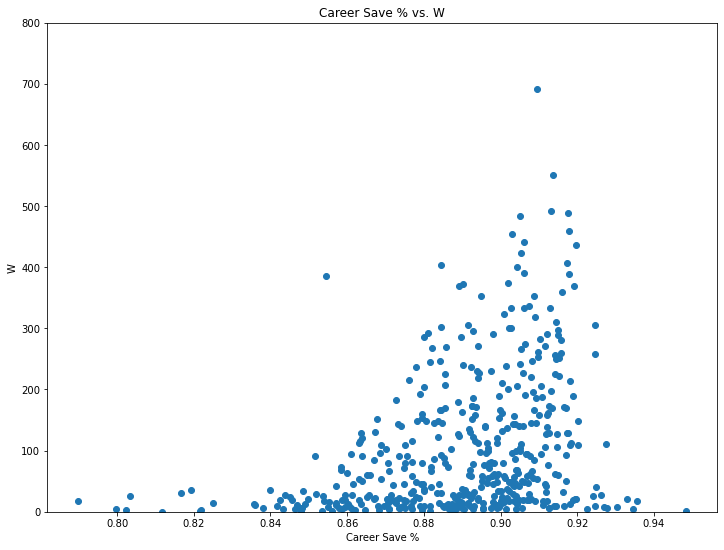

In [10]:
scatterPlot(goalieBioDF, 'Career Save %', 'W', 0, 800)

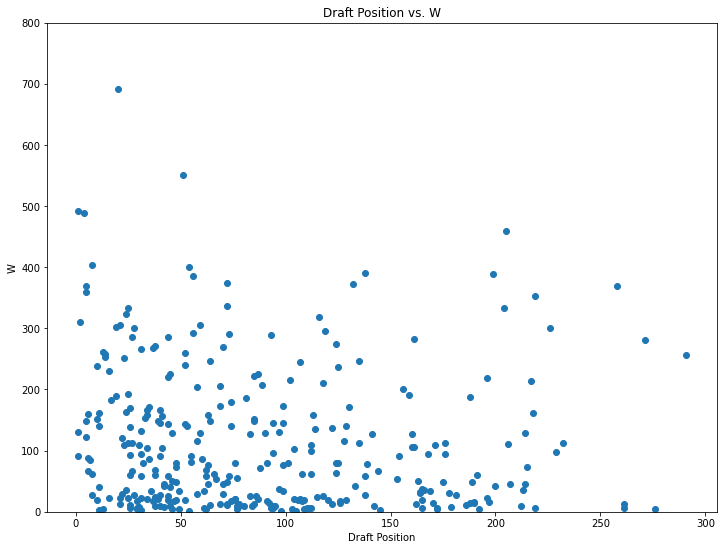

In [11]:
scatterPlot(goalieBioDF, 'Draft Position', 'W', 0, 800)

The above scatter plot shows that fewer goalies have NHL careers as you get later in the draft.  But a goalie can still have a great NHL career if they're drafted later on.

## What goalies tend to get into the Hockey Hall of Fame?

In [21]:
import numpy as np

def barGraph(attribute):
    countN, bin_edgesN = np.histogram(goalieBioDF[goalieBioDF['HOF'] == 'N'][attribute])
    countY, bin_edgesY = np.histogram(goalieBioDF[goalieBioDF['HOF'] == 'Y'][attribute], bins = bin_edgesN)
    
    width = (bin_edgesY[1] - bin_edgesY[0])/3 # the width of the bars

    fig, ax = plt.subplots()
    fig.set_size_inches(12, 9)
    rects1 = ax.bar(bin_edgesY[:-1], countY, width, label='Y')
    rects2 = ax.bar(bin_edgesN[:-1] + width, countN, width, label='N')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Number of Goalies')
    ax.set_title('Bar chart for Hall of Fame Goalies based on ' + attribute)
    ax.set_xticks(bin_edgesN)
    ax.legend()

    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

    fig.tight_layout()
    

    plt.show()


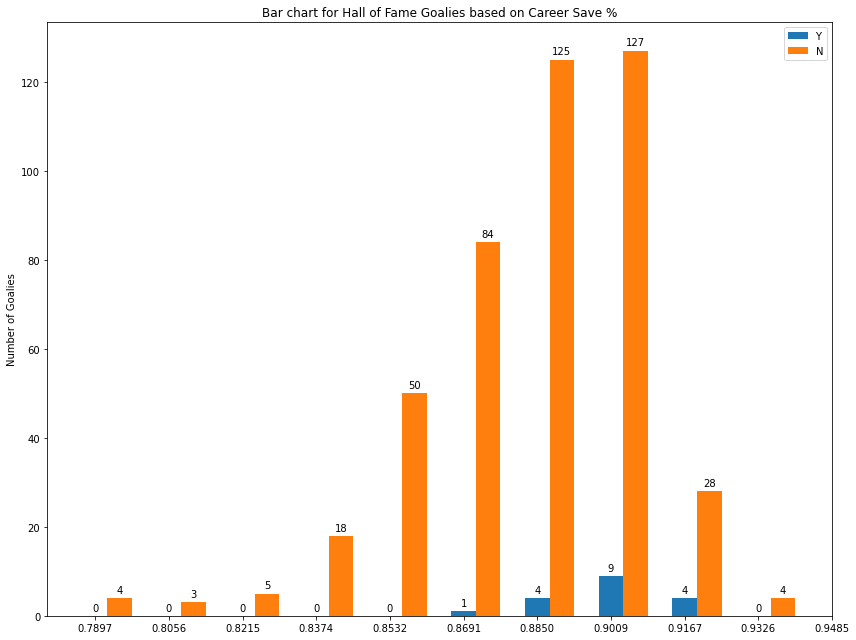

In [22]:
barGraph('Career Save %')

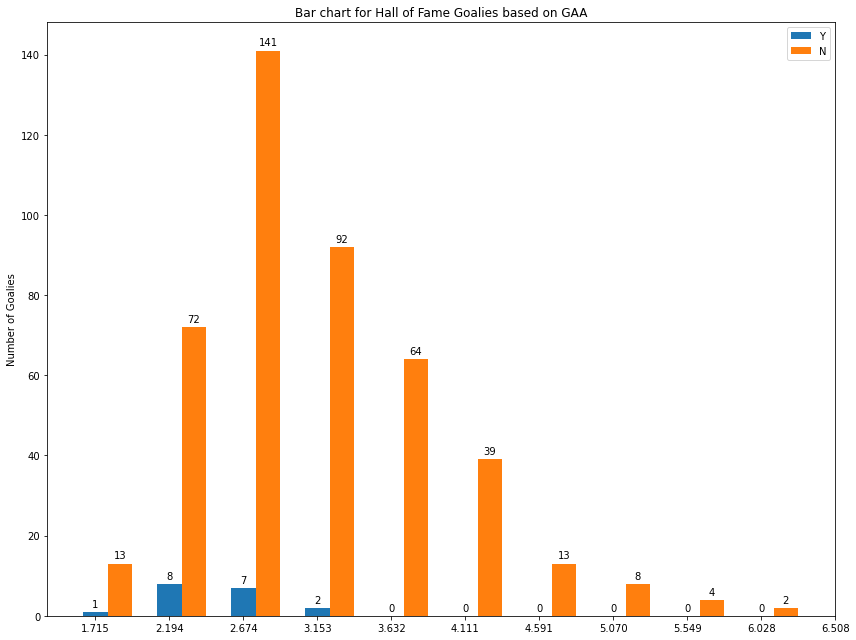

In [23]:
barGraph('GAA')

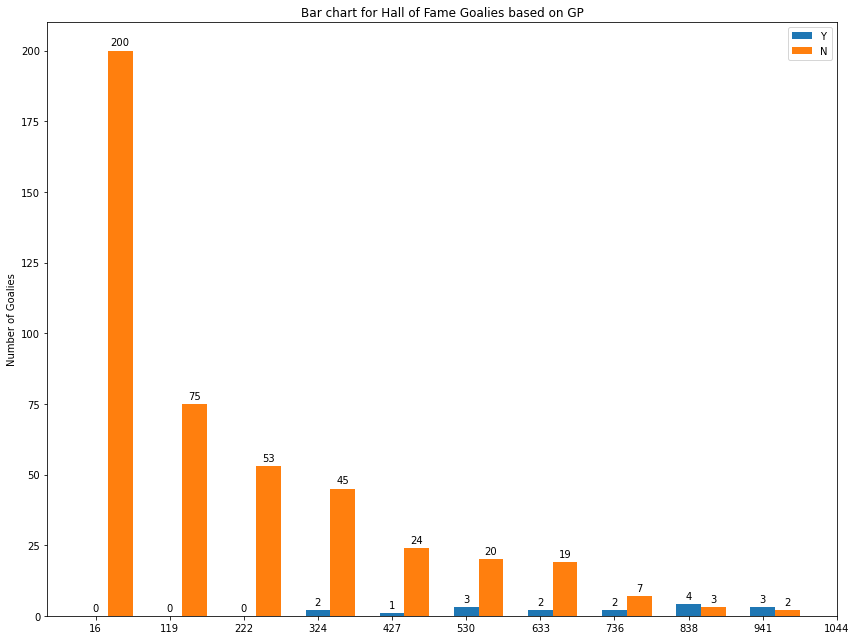

In [25]:
barGraph('GP')

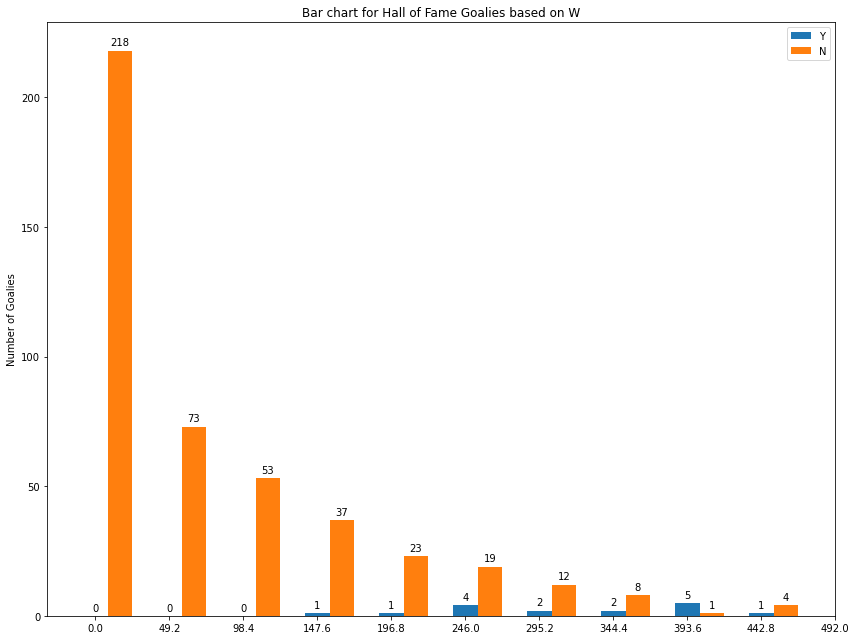

In [26]:
barGraph('W')

### Impressions:

Our exploratory data analysis tells us a few things.  
<ul>
    <li> Goalies' Save % in the 1980's had a pretty pronounced dip.  If we are going to use save % in any predictive models, we would want to account for this dip in some way </li>
    <li> As goalies age past 35, they play fewer games.  But this doesn't seem to be due to a large drop in performance, as their save % appears to remain fairly good even after 35.  This may be confounded by the fact that only very good goalies tend to stay in the NHL that long, but still, there doesn't appear to be a major drop off in skill at that age </li>
    <li> What does seem to stop their careers is that they get injured.  We can see that as their careers get into their twilight, there is certainly a drop off in games played </li>
    <li> It looks like Career Save % is positively correlated with career wins up until about the .910 mark.  This would seem fairly intuitive because the better a goalie is, the higher his save % and the more wins he would have.  So why doesn't it just keep going up?  Because the goalies with a very high save % played a lot of games, which means that they had a bigger sample size to bring out what their true skill level was.  The goalies who had a career save % greater than 0.925 played a lot less games, so they may have just played great in those games and didn't have the opportunity to go through the ups and downs of a long career </li>
    <li> Goalies who were drafted earlier in the NHL entry draft appear to have longer and more successful careers.  However, goalies can still have terrific careers when drafted later in the draft (such as Dominic Hasek).  Indeed, the goalies who were able to find a starting role and were drafted beyond the 200th pick did quite well for the most part.  There just weren't as many who had long successful careers as those drafted in the first couple rounds</li>
    <li> For goalies who made it into the Hockey Hall of Fame, their GAA and Career Save % followed the same general pattern as for those who didn't, but they were pushed more towards exellence. </li>
    <li> For goalies in the HOF, their GP and W stats appear to be much different than those for goalies who haven't made the HOF </li>
    
        
</ul>